# Task 2: To explore supervised learning (scikit-learn)

### Name: Gaurav Pore

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [48]:
#importing neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading data

In [49]:
#Loading datset from remote url
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [50]:
#data
data.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [51]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


(25, 2)

In [52]:
data.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [38]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

## Visualizing data

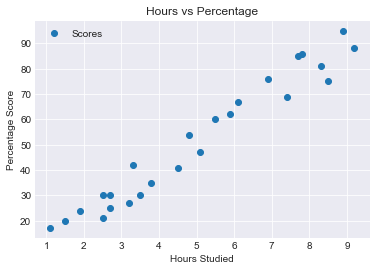

In [33]:
# Plotting correlation between hours and scores
plt.style.use("seaborn-darkgrid")
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

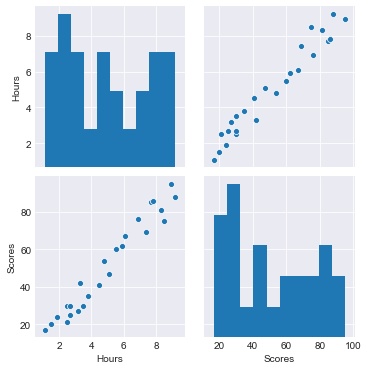

In [34]:
sns.pairplot(data) #visaulizing linear relation

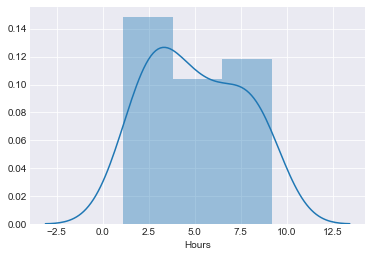

In [53]:
sns.distplot(data["Hours"]) #feature distribution (Hours)

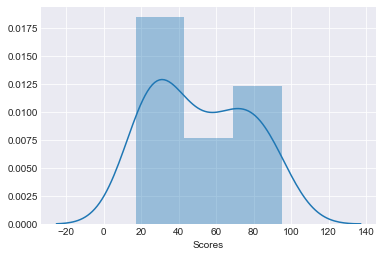

In [54]:
sns.distplot(data["Scores"]) #feature distribution (Scores)

### Preparing Data

In [55]:
X = data.iloc[:, :-1].values #hours  
y = data.iloc[:, 1].values  #scores

#### Train-Test Split

In [46]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Model Training 

In [72]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")
print ( regressor.score(X_test,y_test))

Training complete.
0.9454906892105354


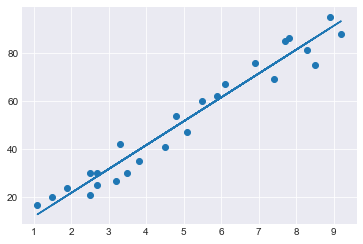

In [56]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions

In [57]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [58]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [64]:
#predicted score if a student study for 9.25 hrs in a day
hours = [9.25]
hours = pd.DataFrame(hours,columns=['Hours'])
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours =    Hours
0   9.25
Predicted Score = 93.69173248737539


### Evaluating the Model

In [73]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
